### Importing Necessary Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

import statsmodels.api as sm
import matplotlib.pyplot as plt
sns.set()
from sklearn.cluster import KMeans

##### Beautification Settings

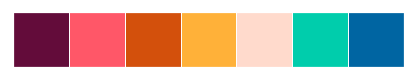

In [2]:
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#define a custom palette
customPalette = ['#630C3A', '#FF5768', '#D3500C', '#FFB139', '#FFDACC', '#00CDAC',\
                '#0065A2']
sns.set_palette(customPalette)
sns.palplot(customPalette)

### Read in the dataset and Feature Selection

In [3]:
df = pd.read_csv('Health_Dataset.csv')

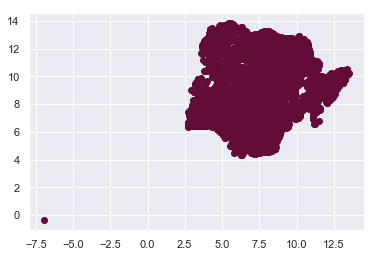

In [4]:
# Creating a scatter plot
plt.scatter(df['X_gps_longitude'],df['X_gps_latitude'])
#plt.xlim(-180,180)
#plt.ylim(-90,90)
plt.show()

In [5]:
# Selecting the columns needed for clustering
workwith = df[['X_gps_longitude','X_gps_latitude']]

In [6]:
workwith

,X_gps_longitude,X_gps_latitude
0,6.879838,5.261363
1,6.640483,6.845640
2,6.641430,6.714820
3,7.737949,5.065792
4,6.880269,5.254864
5,8.486672,9.794160
6,6.939401,5.675088
7,7.563946,4.947375
8,7.914587,9.032754
9,8.391062,11.730856


## Kmeans Algorithm

#### class

In [7]:
class Kmeans:
    '''
        Implementing Kmeans algorithm.
        The way kmeans algorithm works is as follows:
        Specify number of clusters K.
        Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
        Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
        Compute the sum of the squared distance between data points and all centroids.
        Assign each data point to the closest cluster (centroid).
        Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.
    '''

    def __init__(self, n_clusters, max_iter=100, random_state=41):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
    
    # Function to initialize centroid
    #select centeroids at random
    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids
    
    # Compute Centroid 
    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids
    
    # Compute the sum of the squared distance between data points and all 
    # centroids.
    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance
    
    # Function to find the closest cluster
    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    # Compute Sum of Square Error
    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    # Function to train
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    # function to predict
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

### WCSS and Elbow Method

Text(0, 0.5, 'WCSS')

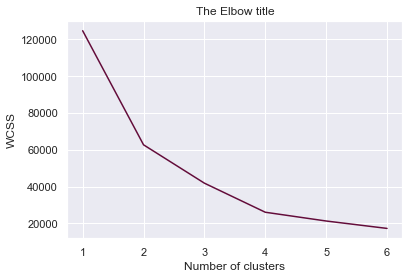

In [8]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(workwith)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [9]:
workwith.head(1)

,X_gps_longitude,X_gps_latitude
0,6.879838,5.261363


****Prediction****

In [10]:
kmeans.predict(workwith.head(1))

# Belongs to cluster Zero

array([4])

#### Cluster Visualization

## Clustering based on Number of Zones

In [11]:
kmeans = KMeans(6) # 6 Number os clusters
kmeans.fit(workwith)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
identified_clusters = kmeans.fit_predict(workwith)
identified_clusters

array([2, 2, 2, ..., 0, 0, 0])

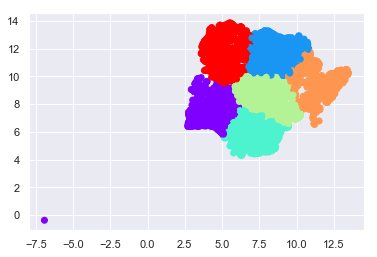

In [13]:
data_with_clusters = workwith.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['X_gps_longitude'],data_with_clusters['X_gps_latitude'],\
            c=data_with_clusters['Clusters'],cmap='rainbow')

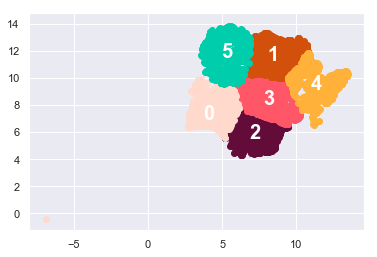

In [14]:
#loop through labels and plot each cluster
for i, label in enumerate(data_with_clusters['Clusters'].unique()):
    plt.scatter(x = data_with_clusters.loc[data_with_clusters['Clusters'] == label,'X_gps_longitude'],\
                y = data_with_clusters.loc[data_with_clusters['Clusters'] == label,'X_gps_latitude'],\
                color=customPalette[i])
    
     #add label
    plt.annotate(label, 
                 data_with_clusters.loc[data_with_clusters['Clusters']==label,['X_gps_longitude','X_gps_latitude']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='white',
                )#backgroundcolor=customPalette[i])

## Clustering based on Number of states

In [15]:
kmeans = KMeans(36) # 36 number of clusters
kmeans.fit(workwith)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=36, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
identified_clusters = kmeans.fit_predict(workwith)
identified_clusters

array([14, 17, 17, ...,  5, 31, 31])

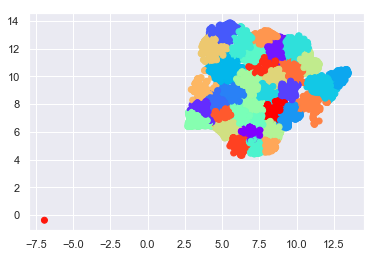

In [17]:
data_with_clusters = workwith.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['X_gps_longitude'],data_with_clusters['X_gps_latitude'],\
            c=data_with_clusters['Clusters'],cmap='rainbow')

### WCSS and Elbow Method

Text(0, 0.5, 'WCSS')

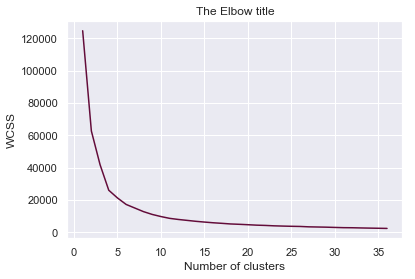

In [18]:
wcss=[]
for i in range(1,37):
    kmeans = KMeans(i)
    kmeans.fit(workwith)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,37)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Silhouette score

We can automatically determine the best number of clusters, k, by selecting the model which yields the highest Silhouette score.

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
# Use silhouette score to find optimal number of clusters to segment the data
num_clusters = np.arange(2,10)
results = {}
for size in num_clusters:
    model = KMeans(n_clusters = size).fit(workwith)
    predictions = model.predict(workwith)
    results[size] = silhouette_score(workwith, predictions)

best_size = max(results, key=results.get)

In [21]:
best_size

4

##### Interesting ...

## Clustering based on elbow method and Silhouette score suggestion

Top 2 suggestion:
* 4

* 3

##### using 4

In [22]:
kmeans = KMeans(4)
kmeans.fit(workwith)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
identified_clusters = kmeans.fit_predict(workwith)
identified_clusters

array([0, 0, 0, ..., 3, 3, 3])

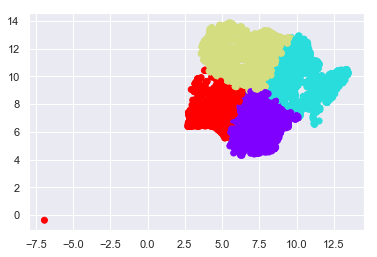

In [24]:
data_with_clusters = workwith.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['X_gps_longitude'],data_with_clusters['X_gps_latitude'],\
            c=data_with_clusters['Clusters'],cmap='rainbow')

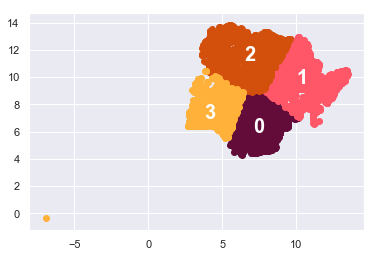

In [25]:
#loop through labels and plot each cluster
for i, label in enumerate(data_with_clusters['Clusters'].unique()):
    plt.scatter(x = data_with_clusters.loc[data_with_clusters['Clusters'] == label,'X_gps_longitude'],\
                y = data_with_clusters.loc[data_with_clusters['Clusters'] == label,'X_gps_latitude'],\
                color=customPalette[i])
                #c=data_with_clusters['Clusters'],cmap='rainbow')
     #add label
    plt.annotate(label, 
                 data_with_clusters.loc[data_with_clusters['Clusters']==label,['X_gps_longitude','X_gps_latitude']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='white',
                 backgroundcolor=customPalette[i])

##### using 3

In [26]:
kmeans = KMeans(3)
kmeans.fit(workwith)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
identified_clusters = kmeans.fit_predict(workwith)
identified_clusters

array([2, 2, 2, ..., 1, 1, 1])

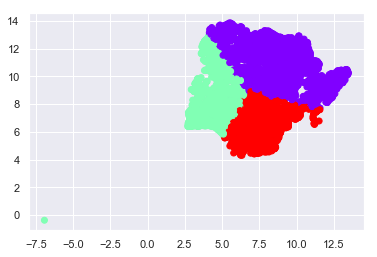

In [28]:
data_with_clusters = workwith.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['X_gps_longitude'],data_with_clusters['X_gps_latitude'],\
            c=data_with_clusters['Clusters'],cmap='rainbow')

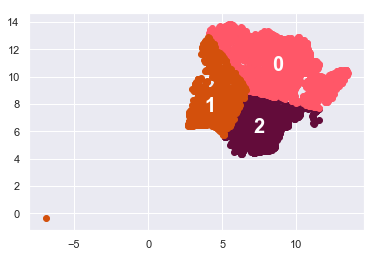

In [29]:
#loop through labels and plot each cluster
for i, label in enumerate(data_with_clusters['Clusters'].unique()):
    plt.scatter(x = data_with_clusters.loc[data_with_clusters['Clusters'] == label,'X_gps_longitude'],\
                y = data_with_clusters.loc[data_with_clusters['Clusters'] == label,'X_gps_latitude'],\
                color=customPalette[i])
                #c=data_with_clusters['Clusters'],cmap='rainbow')
     #add label
    plt.annotate(label, 
                 data_with_clusters.loc[data_with_clusters['Clusters']==label,['X_gps_longitude','X_gps_latitude']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='white',
                 backgroundcolor=customPalette[i])

In [30]:
workwith.head(1)

,X_gps_longitude,X_gps_latitude
0,6.879838,5.261363


****Prediction****

In [31]:
kmeans.predict(workwith.head(1))

array([2])

### using KDTree

This is used to determine in a cluster closest points to a given point in a cluter

from scipy

In [32]:
from scipy.spatial import KDTree
kdtree = KDTree(workwith)
d, i = kdtree.query(workwith.head(1), k = 1) # Return just one point

In [33]:
i

array([0])

In [34]:
print("closest point:", workwith.iloc[int(i)])

closest point: X_gps_longitude    6.879838
X_gps_latitude     5.261363
Name: 0, dtype: float64


***Model Exportation***

In [35]:
import pickle
pickle.dump(kdtree, open('cluster.pkl', 'wb'))

****Return 10 Points****

In [36]:
d, i = kdtree.query(workwith.head(1), k = 10)

In [37]:
print("closest point: \n")
for x in i:
    print(workwith.iloc[x],'\n')

closest point: 

       X_gps_longitude  X_gps_latitude
0             6.879838        5.261363
4             6.880269        5.254864
11132         6.874511        5.251133
11278         6.874511        5.251133
165           6.867466        5.268063
11026         6.867466        5.268063
11297         6.867466        5.268063
11399         6.864503        5.201937
11402         6.824953        5.314625
11355         6.942106        5.309808 



In [38]:
for x in i:
    nearest_points = workwith.iloc[x]

#### Create Dataframe for the results

In [39]:
nearest_points

,X_gps_longitude,X_gps_latitude
0,6.879838,5.261363
4,6.880269,5.254864
11132,6.874511,5.251133
11278,6.874511,5.251133
165,6.867466,5.268063
11026,6.867466,5.268063
11297,6.867466,5.268063
11399,6.864503,5.201937
11402,6.824953,5.314625
11355,6.942106,5.309808


#### From the main dataset return the following

'facility_name'

'facility_type'

'community'

'X_gps_longitude'

'X_gps_latitude'

In [40]:
nearby = df.iloc[nearest_points.index][['facility_name','facility_type','community','X_gps_longitude','X_gps_latitude']]

In [41]:
nearby.reset_index(drop=True, inplace=True)

nearby

,facility_name,facility_type,community,X_gps_longitude,X_gps_latitude
0,St. Maryâs Maternity Home Umuapu,primary_health_centre,Umuapu,6.879838,5.261363
1,Precious Hospital & Maternity Umuapu,primary_health_centre,Umuapu,6.880269,5.254864
2,Dayspring Hospital Umuapu,primary_health_centre,Umuapu,6.874511,5.251133
3,Dayspring Hospital Umuapu,primary_health_centre,Umuapu,6.874511,5.251133
4,Lovelyn Hospital Ltd Ihie Ohaji,primary_health_centre,Ihie,6.867466,5.268063
5,Lovelyn Hospital Ltd Ihie Ohaji,primary_health_centre,Ihie,6.867466,5.268063
6,Lovelyn Hospital Ltd Ihie Ohaji,primary_health_centre,Ihie,6.867466,5.268063
7,PHC Omerulu,primary_health_centre,Omerulu,6.864503,5.201937
8,Rompeter Medical Centre Obitti,primary_health_centre,Obitti,6.824953,5.314625
9,Ngozi Maternity Umuagwo,primary_health_centre,Umuagwo,6.942106,5.309808


#### Using KNN KDTree

In [42]:
from sklearn.neighbors import KDTree
kdtree = KDTree(workwith)
d, i = kdtree.query(workwith.head(1), k = 1)
print("closest point:\n",workwith.iloc[int(i)])

closest point:
 X_gps_longitude    6.879838
X_gps_latitude     5.261363
Name: 0, dtype: float64


In [43]:
workwith.iloc[int(i)]

X_gps_longitude    6.879838
X_gps_latitude     5.261363
Name: 0, dtype: float64

***Bonus Code***

#### Function implementation of Kmeans Clustering

In [44]:
import random
def kmeans(X, k):
    diff = 1
    cluster = np.zeros(X.shape[0])

    # select k random centroids
    random_indices = np.random.choice(len(X), size=k, replace=False)
    centroids = X[random_indices, :]

    while diff:
        # for each observation
        for i, row in enumerate(X):

              mn_dist = float('inf')
              # dist of the point from all centroids
              for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

                # store closest centroid 
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx

        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values

        # if centroids are same then leave
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
        return centroids, cluster

### WCSS and Elbow Method

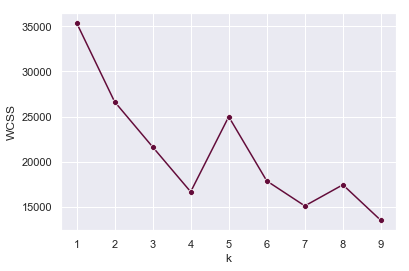

In [45]:
def calculate_cost(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 + (centroids[int(cluster[i]), 1]-val[1])**2)
    return sum

cost_list = []

for k in range(1, 10):
    centroids, cluster = kmeans(workwith.values, k)
  
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(workwith.values, centroids, cluster)
    cost_list.append(cost)

sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [46]:
k = 6
centroids, cluster = kmeans(workwith.values, k)

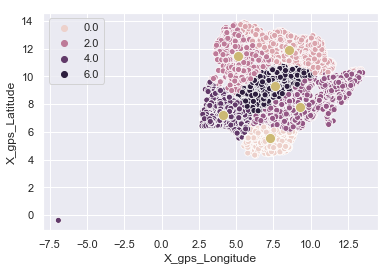

In [47]:
sns.scatterplot(workwith.values[:,0], workwith.values[:, 1], hue=cluster,cmap='rainbow')
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')

plt.xlabel('X_gps_Longitude')
plt.ylabel('X_gps_Latitude')
plt.show()

### Job Fantastically Done